In [1]:
#!pip install Thermobar

In [2]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:350: UserWarning: your input file has some columns that start with spaces. This could cause you big problems if they are at the start of oxide names. Please ammend your file and reload.
  w.warn('your input file has some columns that start with spaces. This could cause you big problems if they are at the start of oxide names. Please ammend your file and reload.')


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.22,0.5007,3.5300,5.32,0.1401,16.67,21.67,0.2527,0.0,0.2984,TP3_cpx1-1
1,52.46,0.3527,2.5085,4.36,0.0958,16.78,22.28,0.2396,0.0,0.5776,TP3_cpx1-2
2,50.74,1.0913,2.0027,11.62,0.2940,15.05,18.08,0.3272,0.0,0.0136,TP3_cpx2
3,51.33,0.5243,2.5074,5.90,0.1708,16.07,21.20,0.2248,0.0,0.1629,TP4_cpx1-1
4,51.78,0.4274,1.7926,7.91,0.2242,15.45,21.04,0.3433,0.0,0.0228,TP4_cpx1-2


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from

## Mt Baker

['Px' 'Amp']


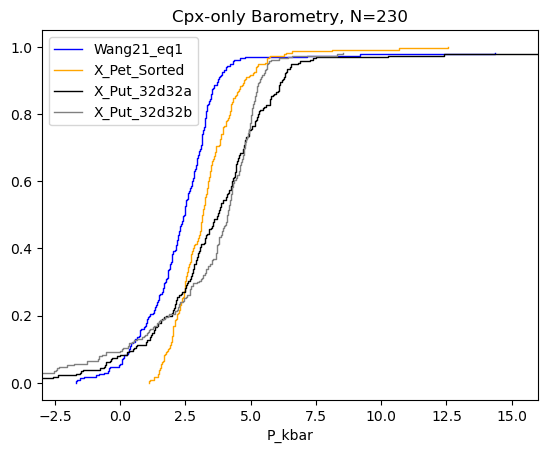

In [4]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    Baker_read_Cpx=pt.import_excel('Baker.xlsx', sheet_name='Cpx_All')
    Baker_Input_Cpx=Baker_read_Cpx['my_input']
    Baker_Cpx=Baker_read_Cpx['Cpxs']
    Baker_Cpx_copy=Baker_Cpx.copy()

    ### Filtering these out.

    Baker_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Baker_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Baker_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Baker_Cpx_class=pt.classify_phases(df=Baker_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Baker_Cpx_class['Phase_Min_Group_ML'].unique())

    Baker_cpx_filt=Baker_Cpx.loc[(Baker_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Baker_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Baker_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Baker_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Baker_Input_filt=Baker_Input_Cpx.loc[((Baker_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Baker_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Baker_Input_filt['Cation_sum_Cpx']=Baker_cpx_comps['Cation_Sum_Cpx']
    Baker_Input_filt['MachineLearning_Class']=Baker_Cpx_class['Phase_Min_Group_ML']
    Baker_Input_filt['Ca_CaMgFe']=Baker_Cpx_class['Ca_CaMgFe']
    Baker_Combo=pd.concat([Baker_cpx_Press_All, Baker_Input_filt], axis=1)
    Baker_Input_filt.to_clipboard(excel=True)

['Px']


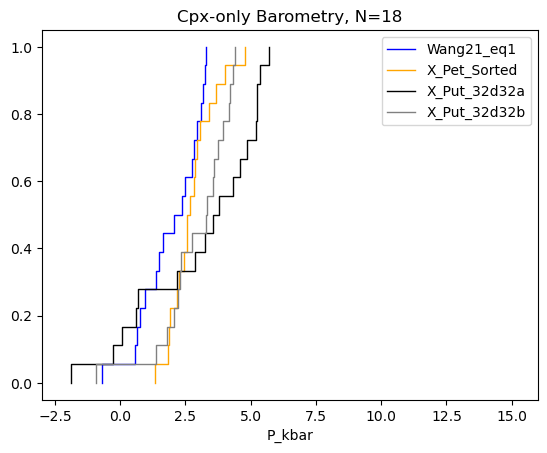

In [5]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Glacier_read_Cpx=pt.import_excel('Glacier.xlsx', sheet_name='Cpx_All')
    Glacier_Input_Cpx=Glacier_read_Cpx['my_input']
    Glacier_Cpx=Glacier_read_Cpx['Cpxs']
    Glacier_Cpx_copy=Glacier_Cpx.copy()

    ### Filtering these out.

    Glacier_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Glacier_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Glacier_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Glacier_Cpx_class=pt.classify_phases(df=Glacier_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Glacier_Cpx_class['Phase_Min_Group_ML'].unique())

    Glacier_cpx_filt=Glacier_Cpx.loc[(Glacier_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Glacier_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Glacier_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Glacier_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Glacier_Input_filt=Glacier_Input_Cpx.loc[((Glacier_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Glacier_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Glacier_Input_filt['Cation_sum_Cpx']=Glacier_cpx_comps['Cation_Sum_Cpx']
    Glacier_Input_filt['MachineLearning_Class']=Glacier_Cpx_class['Phase_Min_Group_ML']
    Glacier_Input_filt['Ca_CaMgFe']=Glacier_Cpx_class['Ca_CaMgFe']
    Glacier_Input_filt.to_clipboard(excel=True)
    Glacier_Combo=pd.concat([Glacier_cpx_Press_All, Glacier_Input_filt], axis=1)

## Mount Ranier

['Px']


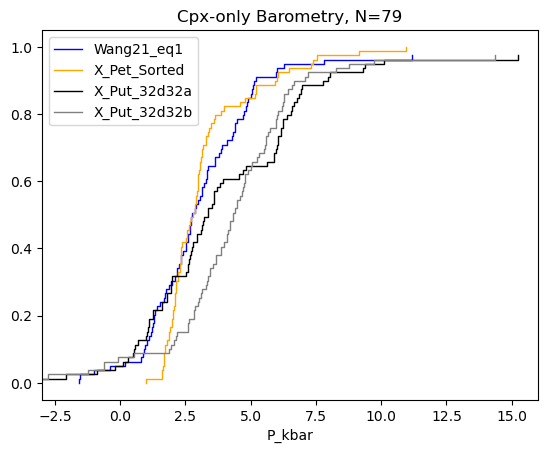

In [53]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Rainier_read_Cpx=pt.import_excel('Rainier.xlsx', sheet_name='Cpx_All')
    Rainier_Input_Cpx=Rainier_read_Cpx['my_input']
    Rainier_Cpx=Rainier_read_Cpx['Cpxs']
    Rainier_Cpx_copy=Rainier_Cpx.copy()

    ### Filtering these out.

    Rainier_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Rainier_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Rainier_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Rainier_Cpx_class=pt.classify_phases(df=Rainier_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Rainier_Cpx_class['Phase_Min_Group_ML'].unique())

    Rainier_cpx_filt=Rainier_Cpx.loc[(Rainier_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Rainier_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Rainier_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Rainier_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Rainier_Input_filt=Rainier_Input_Cpx.loc[((Rainier_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Rainier_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Rainier_Input_filt['Cation_sum_Cpx']=Rainier_cpx_comps['Cation_Sum_Cpx']
    Rainier_Input_filt['MachineLearning_Class']=Rainier_Cpx_class['Phase_Min_Group_ML']
    Rainier_Input_filt['Ca_CaMgFe']=Rainier_Cpx_class['Ca_CaMgFe']
    Rainier_Input_filt.to_clipboard(excel=True)
    Rainier_Combo=pd.concat([Rainier_cpx_Press_All, Rainier_Input_filt], axis=1)

## Mount St Helens
- Need to type up still

['Px' 'Amp']


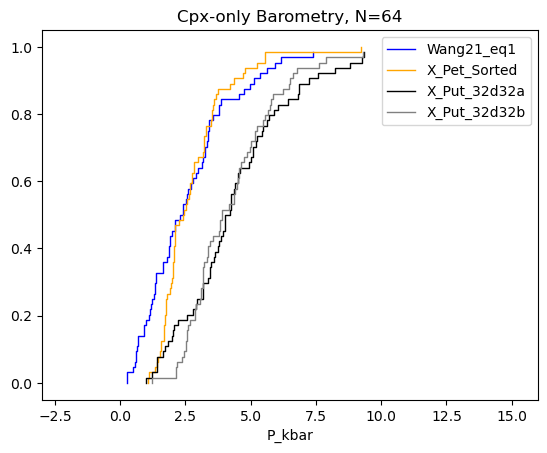

In [7]:
with w.catch_warnings():
    w.simplefilter('ignore')
    MSH_read_Cpx=pt.import_excel('MSH.xlsx', sheet_name='Cpx_All')
    MSH_Input_Cpx=MSH_read_Cpx['my_input']
    MSH_Cpx=MSH_read_Cpx['Cpxs']
    MSH_Cpx_copy=MSH_Cpx.copy()

    ### Filtering these out.

    MSH_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=MSH_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(MSH_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    MSH_Cpx_class=pt.classify_phases(df=MSH_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(MSH_Cpx_class['Phase_Min_Group_ML'].unique())

    MSH_cpx_filt=MSH_Cpx.loc[(MSH_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (MSH_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    MSH_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=MSH_cpx_filt, 
                                                            plot=True, return_cpx=False)

    MSH_Input_filt=MSH_Input_Cpx.loc[((MSH_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (MSH_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    MSH_Input_filt['Cation_sum_Cpx']=MSH_cpx_comps['Cation_Sum_Cpx']
    MSH_Input_filt['MachineLearning_Class']=MSH_Cpx_class['Phase_Min_Group_ML']
    MSH_Input_filt['Ca_CaMgFe']=MSH_Cpx_class['Ca_CaMgFe']
    MSH_Input_filt.to_clipboard(excel=True)
    MSH_Combo=pd.concat([MSH_cpx_Press_All, MSH_Input_filt], axis=1)

## Mount Adams
- All from Hildreth and Fiersten. 

['Px' 'Amp']


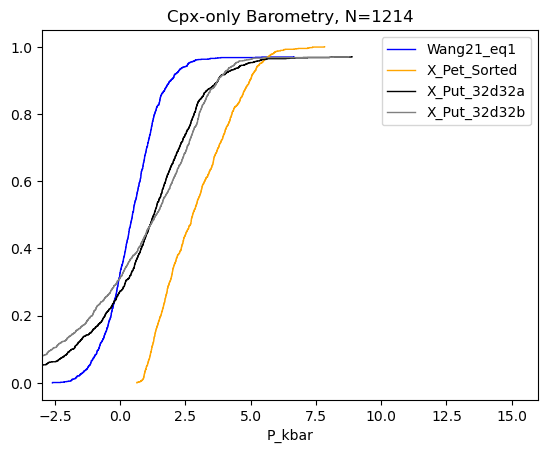

In [8]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Adams_read_Cpx=pt.import_excel('Adams.xlsx', sheet_name='Cpx_All')
    Adams_Input_Cpx=Adams_read_Cpx['my_input']
    Adams_Cpx=Adams_read_Cpx['Cpxs']
    Adams_Cpx_copy=Adams_Cpx.copy()

    ### Filtering these out.

    Adams_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Adams_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Adams_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Adams_Cpx_class=pt.classify_phases(df=Adams_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Adams_Cpx_class['Phase_Min_Group_ML'].unique())

    Adams_cpx_filt=Adams_Cpx.loc[(Adams_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Adams_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Adams_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Adams_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Adams_Input_filt=Adams_Input_Cpx.loc[((Adams_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Adams_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Adams_Input_filt['Cation_sum_Cpx']=Adams_cpx_comps['Cation_Sum_Cpx']
    Adams_Input_filt['MachineLearning_Class']=Adams_Cpx_class['Phase_Min_Group_ML']
    Adams_Input_filt['Ca_CaMgFe']=Adams_Cpx_class['Ca_CaMgFe']
    Adams_Input_filt.to_clipboard(excel=True)
    Adams_Combo=pd.concat([Adams_cpx_Press_All, Adams_Input_filt], axis=1)

In [9]:
Adams_Cpx_class.loc[Adams_Cpx_class['Phase_Min_Group_ML']=="Amp"]

,SiO2_input,TiO2_input,Al2O3_input,FeOt_input,MnO_input,MgO_input,CaO_input,Na2O_input,K2O_input,Ca_B,...,Cation_Sum_Cpx,Ca_CaMgFe,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe
221,53.880,0.818,5.356,11.326,0.311,15.250,10.117,0.815,0.0,1.533708,...,3.901258,0.251822,97.896,Amp,Mg-Hornblende,N/A,N/A,N/A,N/A,N/A
486,50.103,0.079,1.279,1.847,0.377,13.218,19.414,0.303,0.0,3.293826,...,3.908882,0.494669,86.620,Amp,Mg-Hornblende,N/A,N/A,N/A,N/A,N/A
714,51.952,0.601,1.752,9.096,0.268,15.616,16.980,0.343,0.0,2.656039,...,3.977567,0.370687,96.619,Amp,Mg-Hornblende,N/A,N/A,N/A,N/A,N/A
968,52.395,0.514,3.936,12.865,0.454,15.021,12.715,0.240,0.0,1.959436,...,3.941327,0.291256,98.140,Amp,Mg-Hornblende,N/A,N/A,N/A,N/A,N/A


Text(0, 0.5, 'Na2O')

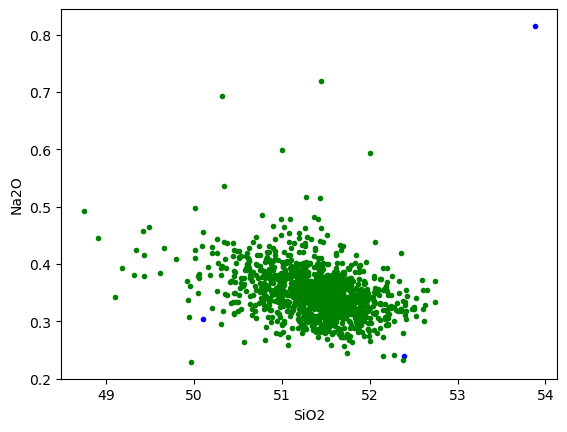

In [10]:
Adams_Amp=Adams_Cpx_class.loc[Adams_Cpx_class['Phase_Min_Group_ML']=="Amp"]
Adams_Cpx=Adams_Cpx_class.loc[Adams_Cpx_class['Phase_Mineral']=="Cpx"]
Adams_Opx=Adams_Cpx_class.loc[Adams_Cpx_class['Phase_Mineral']=="Opx"]
plt.plot(Adams_Amp['SiO2_input'], Adams_Amp['Na2O_input'], '.b')
plt.plot(Adams_Cpx['SiO2_input'], Adams_Cpx['Na2O_input'], '.g')
plt.plot(Adams_Opx['SiO2_input'], Adams_Opx['Na2O_input'], '.r')
plt.xlabel("SiO2")
plt.ylabel("Na2O")

## Mount Hood

['Px' 'Amp']


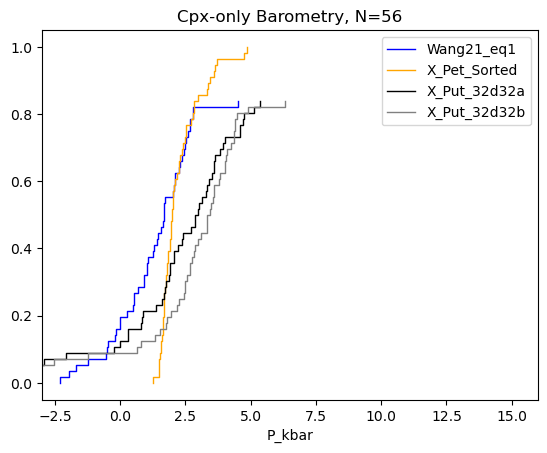

In [11]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Hood_read_Cpx=pt.import_excel('Hood.xlsx', sheet_name='Cpx_All')
    Hood_Input_Cpx=Hood_read_Cpx['my_input']
    Hood_Cpx=Hood_read_Cpx['Cpxs']
    Hood_Cpx_copy=Hood_Cpx.copy()

    ### Filtering these out.

    Hood_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Hood_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Hood_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Hood_Cpx_class=pt.classify_phases(df=Hood_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Hood_Cpx_class['Phase_Min_Group_ML'].unique())

    Hood_cpx_filt=Hood_Cpx.loc[(Hood_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Hood_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Hood_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Hood_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Hood_Input_filt=Hood_Input_Cpx.loc[((Hood_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Hood_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Hood_Input_filt['Cation_sum_Cpx']=Hood_cpx_comps['Cation_Sum_Cpx']
    Hood_Input_filt['MachineLearning_Class']=Hood_Cpx_class['Phase_Min_Group_ML']
    Hood_Input_filt['Ca_CaMgFe']=Hood_Cpx_class['Ca_CaMgFe']
    Hood_Input_filt.to_clipboard(excel=True)
    Hood_Combo=pd.concat([Hood_cpx_Press_All, Hood_Input_filt], axis=1)

In [12]:
Hood_Input_Cpx['Reference'].unique()

array(['Darr_2006_Thesis', 'Cribb_1997_Thesis'], dtype=object)

## Mount Jefferson

['Px' 'Amp']


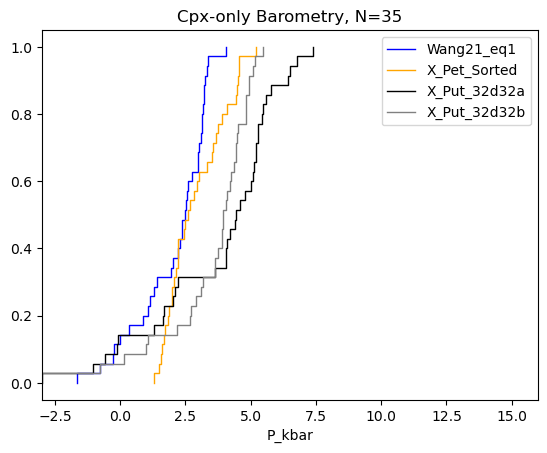

In [13]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Jefferson_read_Cpx=pt.import_excel('Jefferson.xlsx', sheet_name='Cpx_All')
    Jefferson_Input_Cpx=Jefferson_read_Cpx['my_input']
    Jefferson_Cpx=Jefferson_read_Cpx['Cpxs']
    Jefferson_Cpx_copy=Jefferson_Cpx.copy()

    ### Filtering these out.

    Jefferson_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Jefferson_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Jefferson_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Jefferson_Cpx_class=pt.classify_phases(df=Jefferson_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Jefferson_Cpx_class['Phase_Min_Group_ML'].unique())

    Jefferson_cpx_filt=Jefferson_Cpx.loc[(Jefferson_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Jefferson_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Jefferson_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Jefferson_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Jefferson_Input_filt=Jefferson_Input_Cpx.loc[((Jefferson_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Jefferson_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Jefferson_Input_filt['Cation_sum_Cpx']=Jefferson_cpx_comps['Cation_Sum_Cpx']
    Jefferson_Input_filt['MachineLearning_Class']=Jefferson_Cpx_class['Phase_Min_Group_ML']
    Jefferson_Input_filt['Ca_CaMgFe']=Jefferson_Cpx_class['Ca_CaMgFe']
    Jefferson_Input_filt.to_clipboard(excel=True)
    Jefferson_Combo=pd.concat([Jefferson_cpx_Press_All, Jefferson_Input_filt], axis=1)

In [14]:
Jefferson_Input_Cpx['Reference'].unique()

array(['DiGuilio_2015', 'Ustunisik_et_al_2016'], dtype=object)

## North Sister

['Px']


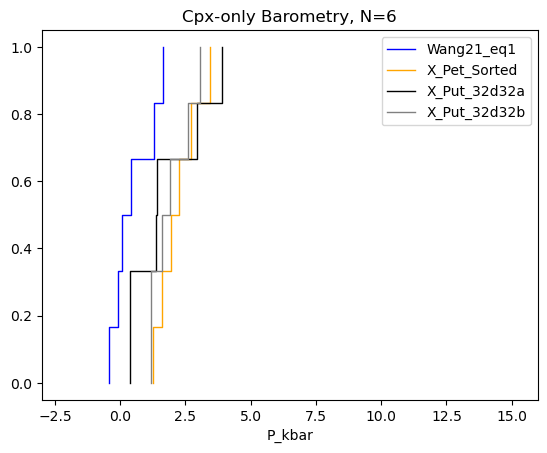

In [ ]:
with w.catch_warnings():
    w.simplefilter('ignore')
    NorthSister_read_Cpx=pt.import_excel('Mid_NorthSister.xlsx', sheet_name='Cpx_All')
    NorthSister_Input_Cpx=NorthSister_read_Cpx['my_input']
    NorthSister_Cpx=NorthSister_read_Cpx['Cpxs']
    NorthSister_Cpx_copy=NorthSister_Cpx.copy()

    ### Filtering these out.

    NorthSister_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=NorthSister_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(NorthSister_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    NorthSister_Cpx_class=pt.classify_phases(df=NorthSister_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(NorthSister_Cpx_class['Phase_Min_Group_ML'].unique())

    NorthSister_cpx_filt=NorthSister_Cpx.loc[(NorthSister_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (NorthSister_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    NorthSister_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=NorthSister_cpx_filt, 
                                                            plot=True, return_cpx=False)

    NorthSister_Input_filt=NorthSister_Input_Cpx.loc[((NorthSister_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (NorthSister_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    NorthSister_Input_filt['Cation_sum_Cpx']=NorthSister_cpx_comps['Cation_Sum_Cpx']
    NorthSister_Input_filt['MachineLearning_Class']=NorthSister_Cpx_class['Phase_Min_Group_ML']
    NorthSister_Input_filt['Ca_CaMgFe']=NorthSister_Cpx_class['Ca_CaMgFe']
    NorthSister_Input_filt.to_clipboard(excel=True)
    NorthSister_Combo=pd.concat([NorthSister_cpx_Press_All, NorthSister_Input_filt], axis=1)

In [ ]:
NorthSister_Input_Cpx['Reference']

0    Schmidt and Grunder, 2011
1    Schmidt and Grunder, 2011
2    Schmidt and Grunder, 2011
3    Schmidt and Grunder, 2011
4    Schmidt and Grunder, 2011
5    Schmidt and Grunder, 2011
Name: Reference, dtype: object

## South Sister
-waiting for Laura to send rest of analyses

['Px']


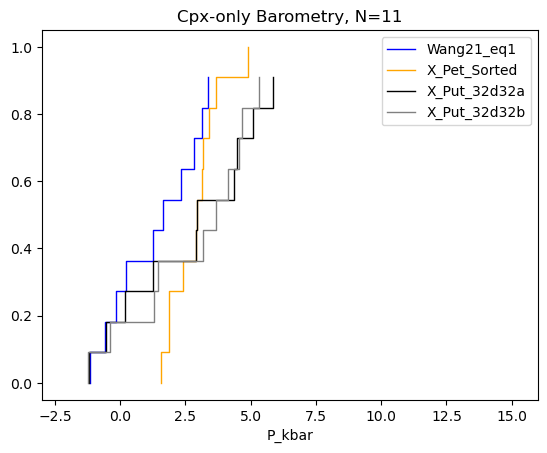

In [17]:
with w.catch_warnings():
    w.simplefilter('ignore')
    SouthSister_read_Cpx=pt.import_excel('South_Sister.xlsx', sheet_name='Cpx_All')
    SouthSister_Input_Cpx=SouthSister_read_Cpx['my_input']
    SouthSister_Cpx=SouthSister_read_Cpx['Cpxs']
    SouthSister_Cpx_copy=SouthSister_Cpx.copy()

    ### Filtering these out.

    SouthSister_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=SouthSister_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(SouthSister_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    SouthSister_Cpx_class=pt.classify_phases(df=SouthSister_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(SouthSister_Cpx_class['Phase_Min_Group_ML'].unique())

    SouthSister_cpx_filt=SouthSister_Cpx.loc[(SouthSister_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (SouthSister_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    SouthSister_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=SouthSister_cpx_filt, 
                                                            plot=True, return_cpx=False)

    SouthSister_Input_filt=SouthSister_Input_Cpx.loc[((SouthSister_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (SouthSister_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    SouthSister_Input_filt['Cation_sum_Cpx']=SouthSister_cpx_comps['Cation_Sum_Cpx']
    SouthSister_Input_filt['MachineLearning_Class']=SouthSister_Cpx_class['Phase_Min_Group_ML']
    SouthSister_Input_filt['Ca_CaMgFe']=SouthSister_Cpx_class['Ca_CaMgFe']
    SouthSister_Input_filt.to_clipboard(excel=True)
    SouthSister_Combo=pd.concat([SouthSister_cpx_Press_All, SouthSister_Input_filt], axis=1)

## Mount Mazama

['Px' 'Amp' 'Not Classified - Total<60']


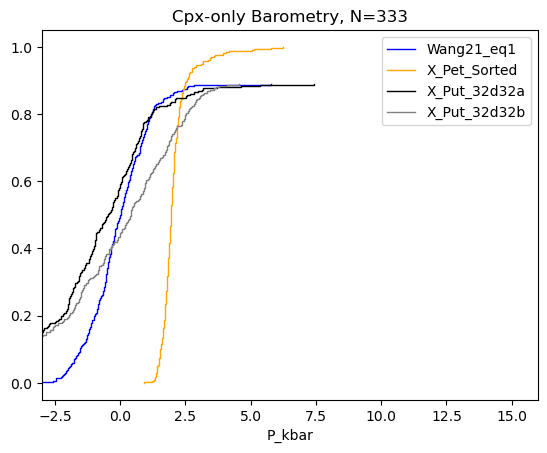

In [18]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Mazama_read_Cpx=pt.import_excel('Mazama.xlsx', sheet_name='Cpx_All')
    Mazama_Input_Cpx=Mazama_read_Cpx['my_input']
    Mazama_Cpx=Mazama_read_Cpx['Cpxs']
    Mazama_Cpx_copy=Mazama_Cpx.copy()

    ### Filtering these out.

    Mazama_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Mazama_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Mazama_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Mazama_Cpx_class=pt.classify_phases(df=Mazama_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Mazama_Cpx_class['Phase_Min_Group_ML'].unique())

    Mazama_cpx_filt=Mazama_Cpx.loc[(Mazama_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Mazama_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Mazama_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Mazama_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Mazama_Input_filt=Mazama_Input_Cpx.loc[((Mazama_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Mazama_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Mazama_Input_filt['Cation_sum_Cpx']=Mazama_cpx_comps['Cation_Sum_Cpx']
    Mazama_Input_filt['MachineLearning_Class']=Mazama_Cpx_class['Phase_Min_Group_ML']
    Mazama_Input_filt['Ca_CaMgFe']=Mazama_Cpx_class['Ca_CaMgFe']
    Mazama_Input_filt.to_clipboard(excel=True)
    Mazama_Combo=pd.concat([Mazama_cpx_Press_All, Mazama_Input_filt], axis=1)    

In [19]:
Mazama_Input_Cpx['Reference'].unique()

array(['Nakada_1994 ', 'Nakada_1994', 'Wright_2012',
       'Druitt and Bacon, 1988'], dtype=object)

In [20]:
# so 300 of them have Jd from Al
sum(Mazama_cpx_Press_All['Jd_from 0=Na, 1=Al'])

300

## Shasta

['Px']


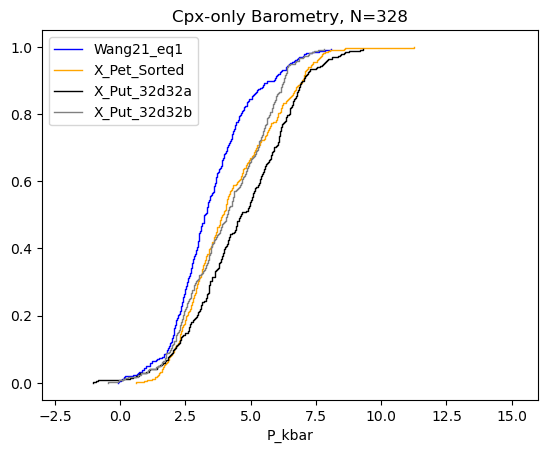

In [21]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Shasta_read_Cpx=pt.import_excel('Shasta.xlsx', sheet_name='Cpx_All')
    Shasta_Input_Cpx=Shasta_read_Cpx['my_input']
    Shasta_Cpx=Shasta_read_Cpx['Cpxs']
    Shasta_Cpx_copy=Shasta_Cpx.copy()

    ### Filtering these out.

    Shasta_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Shasta_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Shasta_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Shasta_Cpx_class=pt.classify_phases(df=Shasta_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Shasta_Cpx_class['Phase_Min_Group_ML'].unique())

    Shasta_cpx_filt=Shasta_Cpx.loc[(Shasta_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Shasta_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Shasta_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Shasta_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Shasta_Input_filt=Shasta_Input_Cpx.loc[((Shasta_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Shasta_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Shasta_Input_filt['Cation_sum_Cpx']=Shasta_cpx_comps['Cation_Sum_Cpx']
    Shasta_Input_filt['MachineLearning_Class']=Shasta_Cpx_class['Phase_Min_Group_ML']
    Shasta_Input_filt['Ca_CaMgFe']=Shasta_Cpx_class['Ca_CaMgFe']
    Shasta_Input_filt.to_clipboard(excel=True)
    Shasta_Combo=pd.concat([Shasta_cpx_Press_All, Shasta_Input_filt], axis=1)        

## Crater Lake

['Px' 'Amp' 'Not Classified - Total<60']


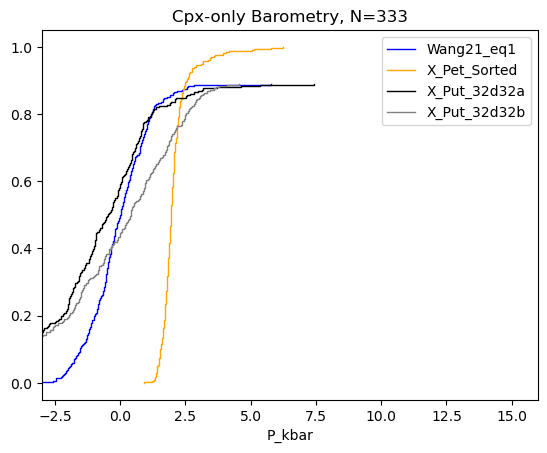

In [22]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Mazama_read_Cpx=pt.import_excel('Mazama.xlsx', sheet_name='Cpx_All')
    Mazama_Input_Cpx=Mazama_read_Cpx['my_input']
    Mazama_Cpx=Mazama_read_Cpx['Cpxs']
    Mazama_Cpx_copy=Mazama_Cpx.copy()

    ### Filtering these out.

    Mazama_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Mazama_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Mazama_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Mazama_Cpx_class=pt.classify_phases(df=Mazama_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Mazama_Cpx_class['Phase_Min_Group_ML'].unique())

    Mazama_cpx_filt=Mazama_Cpx.loc[(Mazama_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Mazama_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Mazama_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Mazama_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Mazama_Input_filt=Mazama_Input_Cpx.loc[((Mazama_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Mazama_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Mazama_Input_filt['Cation_sum_Cpx']=Mazama_cpx_comps['Cation_Sum_Cpx']
    Mazama_Input_filt['MachineLearning_Class']=Mazama_Cpx_class['Phase_Min_Group_ML']
    Mazama_Input_filt['Ca_CaMgFe']=Mazama_Cpx_class['Ca_CaMgFe']
    Mazama_Input_filt.to_clipboard(excel=True)
    Mazama_Combo=pd.concat([Mazama_cpx_Press_All, Mazama_Input_filt], axis=1)        

## Medicine Lake

['Px' 'Amp']


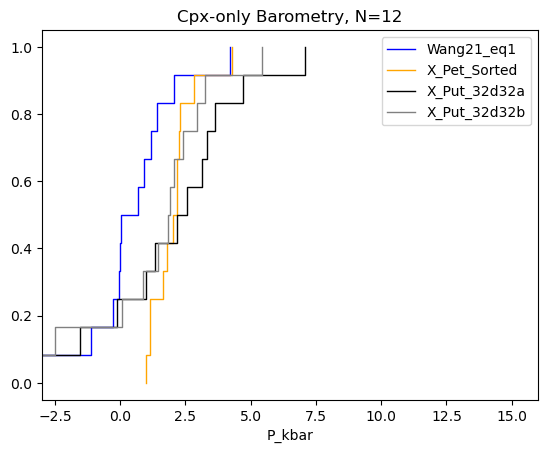

In [23]:
with w.catch_warnings():
    w.simplefilter('ignore')
    MedicineLake_read_Cpx=pt.import_excel('MedicineLake.xlsx', sheet_name='Cpx_All')
    MedicineLake_Input_Cpx=MedicineLake_read_Cpx['my_input']
    MedicineLake_Cpx=MedicineLake_read_Cpx['Cpxs']
    MedicineLake_Cpx_copy=MedicineLake_Cpx.copy()

    ### Filtering these out.

    MedicineLake_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=MedicineLake_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(MedicineLake_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    MedicineLake_Cpx_class=pt.classify_phases(df=MedicineLake_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(MedicineLake_Cpx_class['Phase_Min_Group_ML'].unique())

    MedicineLake_cpx_filt=MedicineLake_Cpx.loc[(MedicineLake_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (MedicineLake_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    MedicineLake_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=MedicineLake_cpx_filt, 
                                                            plot=True, return_cpx=False)

    MedicineLake_Input_filt=MedicineLake_Input_Cpx.loc[((MedicineLake_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (MedicineLake_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    MedicineLake_Input_filt['Cation_sum_Cpx']=MedicineLake_cpx_comps['Cation_Sum_Cpx']
    MedicineLake_Input_filt['MachineLearning_Class']=MedicineLake_Cpx_class['Phase_Min_Group_ML']
    MedicineLake_Input_filt['Ca_CaMgFe']=MedicineLake_Cpx_class['Ca_CaMgFe']
    MedicineLake_Input_filt.to_clipboard(excel=True)
    MedicineLake_Combo=pd.concat([MedicineLake_cpx_Press_All, MedicineLake_Input_filt], axis=1)        

In [24]:
MedicineLake_Combo['Reference'].unique()

array(['Kinzler et al. (2000)', 'Grove and Donnelly-Nolan, 1986',
       'Grove et al. 1997', 'Gerlach and Grove, 1982'], dtype=object)

## Lassen Peak

['Px' 'Amp']


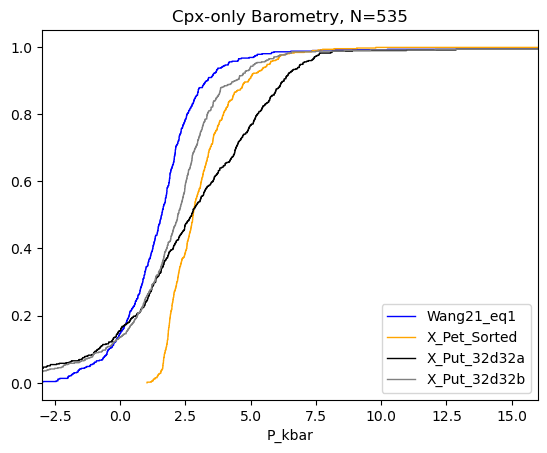

In [25]:
with w.catch_warnings():
    w.simplefilter('ignore')
    Lassen_read_Cpx=pt.import_excel('Lassen.xlsx', sheet_name='Cpx_All')
    Lassen_Input_Cpx=Lassen_read_Cpx['my_input']
    Lassen_Cpx=Lassen_read_Cpx['Cpxs']
    Lassen_Cpx_copy=Lassen_Cpx.copy()

    ### Filtering these out.

    Lassen_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Lassen_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(Lassen_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Lassen_Cpx_class=pt.classify_phases(df=Lassen_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(Lassen_Cpx_class['Phase_Min_Group_ML'].unique())

    Lassen_cpx_filt=Lassen_Cpx.loc[(Lassen_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Lassen_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    Lassen_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Lassen_cpx_filt, 
                                                            plot=True, return_cpx=False)

    Lassen_Input_filt=Lassen_Input_Cpx.loc[((Lassen_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (Lassen_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    Lassen_Input_filt['Cation_sum_Cpx']=Lassen_cpx_comps['Cation_Sum_Cpx']
    Lassen_Input_filt['MachineLearning_Class']=Lassen_Cpx_class['Phase_Min_Group_ML']
    Lassen_Input_filt['Ca_CaMgFe']=Lassen_Cpx_class['Ca_CaMgFe']
    Lassen_Input_filt.to_clipboard(excel=True)
    Lassen_Combo=pd.concat([Lassen_cpx_Press_All, Lassen_Input_filt], axis=1)        

## GaribaldiVolcanicBelt

['Px']


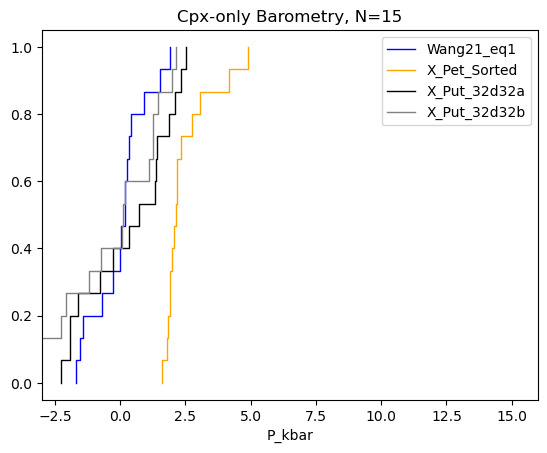

In [26]:
with w.catch_warnings():
    w.simplefilter('ignore')
    GVB_read_Cpx=pt.import_excel('Garibaldi_Volcanic_Belt.xlsx', sheet_name='Cpx_All')
    GVB_Input_Cpx=GVB_read_Cpx['my_input']
    GVB_Cpx=GVB_read_Cpx['Cpxs']
    GVB_Cpx_copy=GVB_Cpx.copy()

    ### Filtering these out.

    GVB_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=GVB_Cpx)
    # Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
    Cat_Sum_Filt=(GVB_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    GVB_Cpx_class=pt.classify_phases(df=GVB_Cpx, return_end_members=True,
                            str_to_drop='_Cpx')
    print(GVB_Cpx_class['Phase_Min_Group_ML'].unique())

    GVB_cpx_filt=GVB_Cpx.loc[(GVB_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (GVB_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))&
                                 Cat_Sum_Filt].reset_index(drop=True)

    GVB_cpx_Press_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=GVB_cpx_filt, 
                                                            plot=True, return_cpx=False)

    GVB_Input_filt=GVB_Input_Cpx.loc[((GVB_Cpx_class['Phase_Min_Group_ML']=="Px")&
                                      (GVB_Cpx_class['Ca_CaMgFe'].between(0.2, 0.5))
                                        &
                                        Cat_Sum_Filt)].reset_index(drop=True)
    GVB_Input_filt['Cation_sum_Cpx']=GVB_cpx_comps['Cation_Sum_Cpx']
    GVB_Input_filt['MachineLearning_Class']=GVB_Cpx_class['Phase_Min_Group_ML']
    GVB_Input_filt['Ca_CaMgFe']=GVB_Cpx_class['Ca_CaMgFe']
    GVB_Input_filt.to_clipboard(excel=True)
    GVB_Combo=pd.concat([GVB_cpx_Press_All, GVB_Input_filt], axis=1)        

### Combining

In [27]:
## Combining
GVB_Combo['Latitude']=49.93
Baker_Combo['Latitude']=48.7767
Glacier_Combo['Latitude']=48.1119
Rainier_Combo['Latitude']=46.8523

MSH_Combo['Latitude']=46.1914
Adams_Combo['Latitude']=46.2024
Hood_Combo['Latitude']=45.3736
Jefferson_Combo['Latitude']=44.6743
NorthSister_Combo['Latitude']=44.1662
SouthSister_Combo['Latitude']=44.1034
Mazama_Combo['Latitude']=42.85
Shasta_Combo['Latitude']=41.544
Lassen_Combo['Latitude']=40.654342
Baker_Combo['Volcano']="Baker"
Glacier_Combo['Volcano']="Glacier"
Rainier_Combo['Volcano']="Rainier"
MSH_Combo['Volcano']="MSH"
Hood_Combo['Volcano']="Hood"
Jefferson_Combo['Volcano']="Jefferson"
NorthSister_Combo['Volcano']="North Sister"
SouthSister_Combo['Volcano']="South Sister"
Mazama_Combo['Volcano']="Mazama"
Shasta_Combo['Volcano']="Shasta"
Lassen_Combo['Volcano']="Lassen"
Adams_Combo['Volcano']="Adams"
Mazama_Combo['Volcano']="CraterLake"
Mazama_Combo['Latitude']=42.9446
GVB_Combo['Volcano']="GVB"
# Other things we need
Shasta_Combo["Stage"]=Shasta_Input_filt['Stage']
MedicineLake_Combo['Volcano']="MedicineLake"
MedicineLake_Combo['Latitude']=41.61063
Combo_Cpx=pd.concat([GVB_Combo, Baker_Combo, Glacier_Combo, Rainier_Combo, Adams_Combo,
                    MSH_Combo,  Hood_Combo, MedicineLake_Combo,
                     Jefferson_Combo, NorthSister_Combo,
SouthSister_Combo, Mazama_Combo, Shasta_Combo, Lassen_Combo], axis=0)
Combo_Cpx['Phase']="Cpx"
Combo_Cpx['Preferred_P']=Combo_Cpx['P_Wang21_eq1']
Combo_Cpx['Preferred_P2']=Combo_Cpx['P_Jorgenson22']
from pickle import dump
import pickle
dump(Combo_Cpx, open('Combo_Cpx.pkl', 'wb'))

In [89]:
Combo_Cpx.to_excel('Filtered_Cpx_all_volcanoes_April23.xlsx')

In [28]:
Baker_Combo.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Total,Cation_sum_Cpx,MachineLearning_Class,Ca_CaMgFe,Latitude
0,2.517872,1456.687076,1322.712189,2.961366,1350.223333,1421.290000,1.799002,1461.901365,1455.596842,2.498804,...,0.1401,16.67,21.67,0.2527,NaN,100.6019,4.012393,Px,0.442100,48.7767
1,1.705477,1460.945299,1358.279353,3.236736,1359.043333,1440.481111,1.471578,1438.978968,1442.018975,2.171644,...,0.0958,16.78,22.28,0.2396,NaN,99.6542,4.010013,Px,0.454417,48.7767
2,0.073163,1387.467416,1353.926119,0.602960,1368.614444,1380.090000,1.441304,1386.148579,1374.458209,1.506584,...,0.2940,15.05,18.08,0.3272,NaN,99.2188,4.018674,Px,0.375967,48.7767
3,0.644088,1431.222749,1297.771891,1.651684,1294.421111,1405.456667,1.138762,1435.385873,1436.421659,2.041309,...,0.1708,16.07,21.20,0.2248,NaN,98.0902,4.011215,Px,0.440163,48.7767
4,0.058494,1410.391090,1325.622637,1.033955,1326.328889,1403.333333,1.032220,1412.363304,1421.255077,1.875191,...,0.2242,15.45,21.04,0.3433,NaN,98.9903,4.020115,Px,0.431942,48.7767


In [29]:
MedicineLake_Combo

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,MgO_Cpx,CaO_Cpx,Na2O_Cpx,Cr2O3_Cpx,K2O_Cpx,Total,Cation_sum_Cpx,MachineLearning_Class,Ca_CaMgFe,Latitude
0,1.174656,1429.795381,1387.393781,1.121759,1367.403333,1430.916667,0.495613,1449.927008,1443.803571,1.132780,...,16.30,20.50,0.29,0.64,0.00,NaN,4.013699,Px,0.421441,41.61063
1,-0.277807,1412.607486,1348.140050,1.691935,1315.896667,1381.706667,1.103384,1426.634482,1428.250157,2.267609,...,16.01,21.29,0.16,0.39,0.00,99.53,4.004187,Px,0.436107,41.61063
2,-3.659129,1361.299256,1324.135075,0.843557,1294.648889,1350.580000,1.105371,1329.790077,1332.129648,1.799151,...,15.24,21.44,0.22,0.05,0.00,101.07,4.028947,Px,0.427561,41.61063
3,0.700781,1409.420381,1380.552985,1.756400,1374.181111,1435.534444,1.287976,1438.665810,1427.044610,2.162647,...,15.63,20.46,0.26,0.33,NaN,100.16,4.019637,Px,0.423101,41.61063
4,1.422243,1408.706550,1380.403731,0.899239,1385.665556,1406.910000,0.835840,1436.864923,1433.994878,0.975482,...,15.25,19.55,0.29,0.00,NaN,99.99,4.008819,Px,0.405679,41.61063
5,0.899259,1431.963013,1349.747015,1.419311,1330.316667,1429.174444,0.389113,1450.353835,1449.473949,2.301909,...,17.00,20.20,0.25,0.28,NaN,100.00,4.017663,Px,0.409664,41.61063
6,0.036703,1408.769400,1406.856468,1.822435,1398.321111,1431.467778,1.925582,1432.253726,1423.054371,2.182378,...,16.70,19.10,0.28,0.14,0.00,100.00,4.035310,Px,0.033885,41.61063
7,4.205289,1440.204178,1404.950995,2.834455,1414.924444,1417.255556,4.821711,1475.988649,1462.163775,4.300127,...,17.60,15.50,0.36,0.29,0.00,99.70,4.037988,Px,0.387626,41.61063
8,2.073368,1430.089373,1394.861443,0.255353,1388.814444,1398.771111,1.021738,1465.016178,1450.066333,1.126124,...,17.20,16.90,0.16,0.17,NaN,99.00,4.011156,Px,0.321689,41.61063
9,-0.053378,1395.206458,1383.781841,0.619465,1328.141111,1362.285556,0.889056,1427.752355,1434.761153,1.652476,...,16.60,18.90,0.22,0.01,0.00,100.70,3.999435,Px,0.350061,41.61063


In [30]:
Combo_Cpx=pd.concat([Baker_Combo.reset_index(drop=True), Glacier_Combo.reset_index(drop=True)], axis=0)
Combo_Cpx

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Total,Cation_sum_Cpx,MachineLearning_Class,Ca_CaMgFe,Latitude,SampleID
0,2.517872,1456.687076,1322.712189,2.961366,1350.223333,1421.290000,1.799002,1461.901365,1455.596842,2.498804,...,16.67,21.67,0.2527,NaN,100.6019,4.012393,Px,0.442100,48.7767,NaN
1,1.705477,1460.945299,1358.279353,3.236736,1359.043333,1440.481111,1.471578,1438.978968,1442.018975,2.171644,...,16.78,22.28,0.2396,NaN,99.6542,4.010013,Px,0.454417,48.7767,NaN
2,0.073163,1387.467416,1353.926119,0.602960,1368.614444,1380.090000,1.441304,1386.148579,1374.458209,1.506584,...,15.05,18.08,0.3272,NaN,99.2188,4.018674,Px,0.375967,48.7767,NaN
3,0.644088,1431.222749,1297.771891,1.651684,1294.421111,1405.456667,1.138762,1435.385873,1436.421659,2.041309,...,16.07,21.20,0.2248,NaN,98.0902,4.011215,Px,0.440163,48.7767,NaN
4,0.058494,1410.391090,1325.622637,1.033955,1326.328889,1403.333333,1.032220,1412.363304,1421.255077,1.875191,...,15.45,21.04,0.3433,NaN,98.9903,4.020115,Px,0.431942,48.7767,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2.495103,1431.283132,1348.533085,2.881199,1358.361111,1446.381111,4.216227,1464.954954,1451.294441,4.024876,...,16.35,20.30,0.3654,NaN,99.3400,4.027949,Px,0.421572,48.1119,12_2_2
14,2.387178,1462.589066,1419.727114,2.004443,1416.747778,1444.483333,0.906213,1471.853146,1464.057033,1.348571,...,17.28,21.11,0.2571,NaN,99.9500,4.008004,Px,0.433923,48.1119,12_2_4
15,2.763997,1442.357372,1379.403731,1.860868,1364.740000,1429.221111,2.959924,1470.740408,1465.065393,2.844829,...,17.09,19.31,0.3550,NaN,99.6600,4.015115,Px,0.396891,48.1119,12_4_8
16,0.628950,1398.005624,1304.495771,2.082055,1336.505556,1415.668889,2.928171,1421.350499,1418.329407,2.878880,...,15.50,20.54,0.4011,NaN,99.7000,4.033613,Px,0.422432,48.1119,12_4_9


In [31]:
Combo_Cpx.loc[Combo_Cpx['Cr2O3_Cpx']>1.5]

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Total,Cation_sum_Cpx,MachineLearning_Class,Ca_CaMgFe,Latitude,SampleID


In [32]:
100*sum(Combo_Cpx['Jd_from 0=Na, 1=Al']==0)/len(Combo_Cpx)
Jd_from_Na=(Combo_Cpx['Jd_from 0=Na, 1=Al']==0)
Jd_from_Al=(Combo_Cpx['Jd_from 0=Na, 1=Al']==1)

In [33]:
100*sum(Combo_Cpx['Jd_from 0=Na, 1=Al']==1)/len(Combo_Cpx)

29.838709677419356

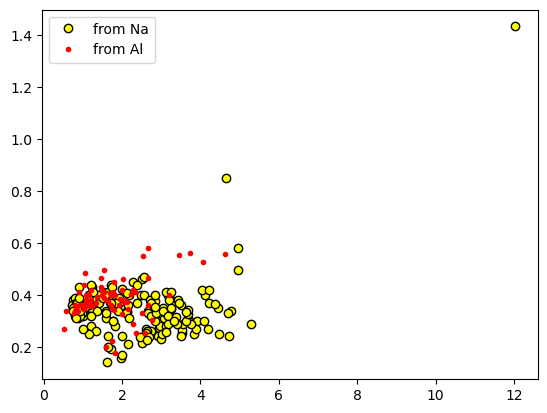

In [34]:
plt.plot(Combo_Cpx['Al2O3_Cpx'].loc[Jd_from_Na], Combo_Cpx['Na2O_Cpx'].loc[Jd_from_Na],
         'ok', mfc='yellow', label='from Na')
plt.plot(Combo_Cpx['Al2O3_Cpx'].loc[Jd_from_Al], Combo_Cpx['Na2O_Cpx'].loc[Jd_from_Al],
         '.r', mfc='red', label='from Al')
plt.legend()

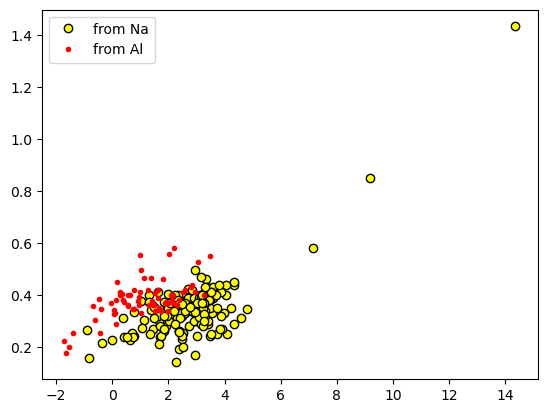

In [35]:
plt.plot(Combo_Cpx['P_Wang21_eq1'].loc[Jd_from_Na], Combo_Cpx['Na2O_Cpx'].loc[Jd_from_Na],
         'ok', mfc='yellow', label='from Na')
plt.plot(Combo_Cpx['P_Wang21_eq1'].loc[Jd_from_Al], Combo_Cpx['Na2O_Cpx'].loc[Jd_from_Al],
         '.r', mfc='red', label='from Al')
plt.legend()

(array([ 5.,  7., 22., 33., 49., 62., 53.,  9.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.70561312, -0.90234227, -0.09907142,  0.70419943,  1.50747027,
         2.31074112,  3.11401197,  3.91728282,  4.72055367,  5.52382452,
         6.32709537,  7.13036622,  7.93363706,  8.73690791,  9.54017876,
        10.34344961, 11.14672046, 11.94999131, 12.75326216, 13.556533  ,
        14.35980385]),
 <BarContainer object of 20 artists>)

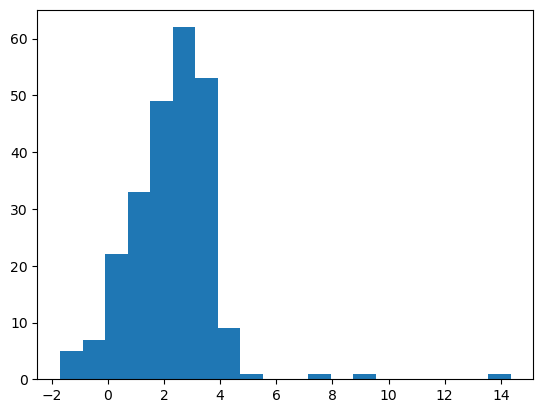

In [36]:
plt.hist(Combo_Cpx['P_Wang21_eq1'], bins=20)

## Violin plots for each volcano

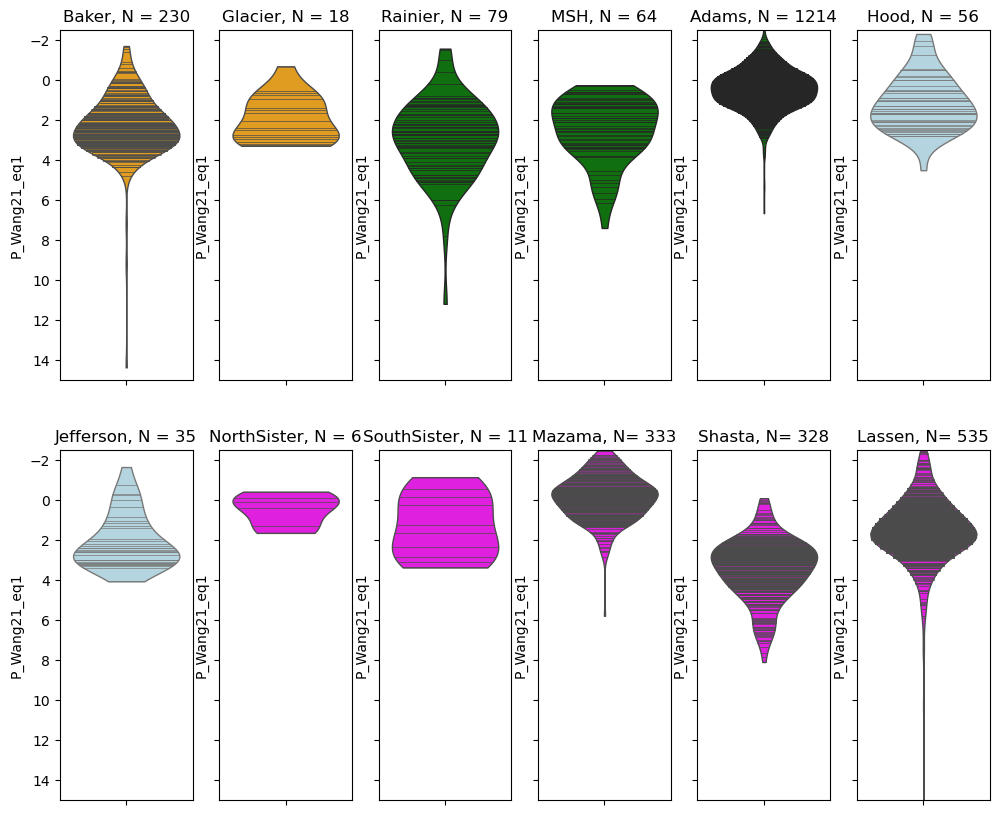

In [37]:
Pequation="P_Wang21_eq1"
import seaborn as sns
fig, ((ax1, ax2, ax3, ax4, ax5, ax6),  (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize=(12, 10), sharey=True)
Baker_cpx_Press_All
ax1.set_title("Baker, N = "+str(len(Baker_cpx_Press_All)))
ax = sns.violinplot(y=Baker_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax1, color="orange", linewidth=1, 
                   linecolor='r')
ax2.set_title("Glacier, N = "+str(len(Glacier_cpx_Press_All)))
ax = sns.violinplot(y=Glacier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax2, color="orange", linewidth=1, 
                   linecolor='r')
ax3.set_title("Rainier, N = "+str(len(Rainier_cpx_Press_All)))
ax = sns.violinplot(y=Rainier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax3, color="green", linewidth=1, 
                   linecolor='r')
ax4.set_title("MSH, N = "+str(len(MSH_cpx_Press_All)))

ax = sns.violinplot(y=MSH_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax4, color="green", linewidth=1, 
                   linecolor='r')
ax5.set_title("Adams, N = "+str(len(Adams_cpx_Press_All)))
ax = sns.violinplot(y=Adams_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax5, color="green", linewidth=1, 
                   linecolor='r')
ax6.set_title("Hood, N = "+str(len(Hood_cpx_Press_All)))
ax = sns.violinplot(y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
                   linecolor='r')

ax7.set_title("Jefferson, N = "+str(len(Jefferson_cpx_Press_All)))
ax = sns.violinplot(y=Jefferson_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax7, color="lightblue", linewidth=1, 
                   linecolor='r')

ax8.set_title("NorthSister, N = "+str(len(NorthSister_cpx_Press_All)))
ax = sns.violinplot(y=NorthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax8, color="magenta", linewidth=1, 
                   linecolor='r')

ax9.set_title("SouthSister, N = "+str(len(SouthSister_cpx_Press_All)))
ax = sns.violinplot(y=SouthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax9, color="magenta", linewidth=1, 
                   linecolor='r')

ax10.set_title("Mazama, N= "+str(len(Mazama_cpx_Press_All)))
ax = sns.violinplot(y=Mazama_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax10, color="magenta", linewidth=1, 
                   linecolor='r')

ax11.set_title("Shasta, N= "+str(len(Shasta_cpx_Press_All)))
ax = sns.violinplot(y=Shasta_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax11, color="magenta", linewidth=1, 
                   linecolor='r')

ax12.set_title("Lassen, N= "+str(len(Lassen_cpx_Press_All)))
ax = sns.violinplot(y=Lassen_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax12, color="magenta", linewidth=1, 
                   linecolor='r')
plt.ylim([-2.5, 15])
plt.gca().invert_yaxis()


In [38]:
len(Combo_Cpx)

248

NameError: name 'axes' is not defined

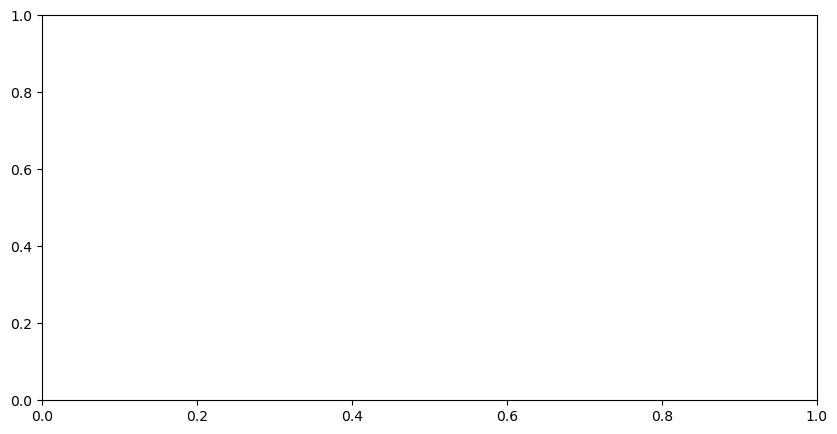

In [39]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5), sharey=True)
axes_cols = (axes.flatten()[::2], axes.flatten()[1::2])
Combo_Cpx['Phase']="Cpx"
Combo_Cpx.loc[0:10, 'Phase']="Amp"

sns.violinplot(x="Latitude", y="P_Petrelli21", hue="Phase", cut=0, inner="stick",
            data=Combo_Cpx, split=True, ax=ax1)
# (y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
#                    linecolor='r')
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(10, 16), sharey='row')
axes_cols = (axes.flatten()[::2], axes.flatten()[1::2])
Combo_Cpx['Phase']="Cpx"
Combo_Cpx.loc[0:10, 'Phase']="Amp"
for (sex_name, sex), axes_col in zip(Combo_Cpx.groupby('Latitude'), axes_cols):
    sns.countplot(x="Latitude", hue="Latitude", data=sex, ax=axes_col[0])
    for scale, ax in zip(['area', 'count', 'width'], axes_col[1:]):
        sns.violinplot(x="Latitude", y="P_Petrelli21", hue="Phase",
            data=Combo_Cpx, split=True, ax=ax, scale=scale)
        ax.set_title('scale = {}'.format(scale), y=0.95)
sns.despine()
fig.tight_layout()

## Petrelli 21

In [ ]:
Pequation="P_Petrelli21"
import seaborn as sns
fig, ((ax1, ax2, ax3, ax4, ax5, ax6),  (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize=(12, 10), sharey=True)
Baker_cpx_Press_All
ax1.set_title("Baker, N = "+str(len(Baker_cpx_Press_All)))
ax = sns.violinplot(y=Baker_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax1, color="orange", linewidth=1, 
                   linecolor='r')
ax2.set_title("Glacier, N = "+str(len(Glacier_cpx_Press_All)))
ax = sns.violinplot(y=Glacier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax2, color="orange", linewidth=1, 
                   linecolor='r')
ax3.set_title("Rainier, N = "+str(len(Rainier_cpx_Press_All)))
ax = sns.violinplot(y=Rainier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax3, color="green", linewidth=1, 
                   linecolor='r')
ax4.set_title("MSH, N = "+str(len(MSH_cpx_Press_All)))

ax = sns.violinplot(y=MSH_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax4, color="green", linewidth=1, 
                   linecolor='r')
ax5.set_title("Adams, N = "+str(len(Adams_cpx_Press_All)))
ax = sns.violinplot(y=Adams_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax5, color="green", linewidth=1, 
                   linecolor='r')
ax6.set_title("Hood, N = "+str(len(Hood_cpx_Press_All)))
ax = sns.violinplot(y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
                   linecolor='r')

ax7.set_title("Jefferson, N = "+str(len(Jefferson_cpx_Press_All)))
ax = sns.violinplot(y=Jefferson_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax7, color="lightblue", linewidth=1, 
                   linecolor='r')

ax8.set_title("NorthSister, N = "+str(len(NorthSister_cpx_Press_All)))
ax = sns.violinplot(y=NorthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax8, color="magenta", linewidth=1, 
                   linecolor='r')

ax9.set_title("SouthSister, N = "+str(len(SouthSister_cpx_Press_All)))
ax = sns.violinplot(y=SouthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax9, color="magenta", linewidth=1, 
                   linecolor='r')

ax10.set_title("Mazama, N= "+str(len(Mazama_cpx_Press_All)))
ax = sns.violinplot(y=Mazama_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax10, color="magenta", linewidth=1, 
                   linecolor='r')

ax11.set_title("Shasta, N= "+str(len(Shasta_cpx_Press_All)))
ax = sns.violinplot(y=Shasta_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax11, color="magenta", linewidth=1, 
                   linecolor='r')

ax12.set_title("Lassen, N= "+str(len(Lassen_cpx_Press_All)))
ax = sns.violinplot(y=Lassen_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax12, color="magenta", linewidth=1, 
                   linecolor='r')
plt.ylim([-2.5, 15])
plt.gca().invert_yaxis()


## Puirka 32a -H2O-indep

In [ ]:
Pequation="P_Put_Teq32d_Peq32a"
import seaborn as sns
fig, ((ax1, ax2, ax3, ax4, ax5, ax6),  (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize=(12, 10), sharey=True)
Baker_cpx_Press_All
ax1.set_title("Baker, N = "+str(len(Baker_cpx_Press_All)))
ax = sns.violinplot(y=Baker_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax1, color="orange", linewidth=1, 
                   linecolor='r')
ax2.set_title("Glacier, N = "+str(len(Glacier_cpx_Press_All)))
ax = sns.violinplot(y=Glacier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax2, color="orange", linewidth=1, 
                   linecolor='r')
ax3.set_title("Rainier, N = "+str(len(Rainier_cpx_Press_All)))
ax = sns.violinplot(y=Rainier_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax3, color="green", linewidth=1, 
                   linecolor='r')
ax4.set_title("MSH, N = "+str(len(MSH_cpx_Press_All)))

ax = sns.violinplot(y=MSH_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax4, color="green", linewidth=1, 
                   linecolor='r')
ax5.set_title("Adams, N = "+str(len(Adams_cpx_Press_All)))
ax = sns.violinplot(y=Adams_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax5, color="green", linewidth=1, 
                   linecolor='r')
ax6.set_title("Hood, N = "+str(len(Hood_cpx_Press_All)))
ax = sns.violinplot(y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
                   linecolor='r')

ax7.set_title("Jefferson, N = "+str(len(Jefferson_cpx_Press_All)))
ax = sns.violinplot(y=Jefferson_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax7, color="lightblue", linewidth=1, 
                   linecolor='r')

ax8.set_title("NorthSister, N = "+str(len(NorthSister_cpx_Press_All)))
ax = sns.violinplot(y=NorthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax8, color="magenta", linewidth=1, 
                   linecolor='r')

ax9.set_title("SouthSister, N = "+str(len(SouthSister_cpx_Press_All)))
ax = sns.violinplot(y=SouthSister_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax9, color="magenta", linewidth=1, 
                   linecolor='r')

ax10.set_title("Mazama, N= "+str(len(Mazama_cpx_Press_All)))
ax = sns.violinplot(y=Mazama_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax10, color="magenta", linewidth=1, 
                   linecolor='r')

ax11.set_title("Shasta, N= "+str(len(Shasta_cpx_Press_All)))
ax = sns.violinplot(y=Shasta_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax11, color="magenta", linewidth=1, 
                   linecolor='r')

ax12.set_title("Lassen, N= "+str(len(Lassen_cpx_Press_All)))
ax = sns.violinplot(y=Lassen_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax12, color="magenta", linewidth=1, 
                   linecolor='r')
plt.ylim([-2.5, 15])
plt.gca().invert_yaxis()


## Combine Data along with Latitude, save to a pickle

In [ ]:
xaxis="P_Petrelli21"
yaxis="P_Wang21_eq1"#"P_Petrelli21"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel('Petrelli 2021 (kbar)')
plt.ylabel('Wang eq 1 (kbar)')
plt.plot([-5, 12], [-5, 12], ':r')

In [ ]:
xaxis="P_Put_Teq32d_Peq32a"
yaxis="P_Wang21_eq1"#"P_Petrelli21"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(str(xaxis))
plt.ylabel(str(yaxis))
plt.plot([-5, 12], [-5, 12], ':r')

In [ ]:
xaxis="P_Put_Teq32d_Peq32b"
yaxis="P_Wang21_eq1"#"P_Petrelli21"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(str(xaxis))
plt.ylabel(str(yaxis))
plt.plot([-5, 12], [-5, 12], ':r')

In [ ]:
xaxis="P_Put_Teq32d_Peq32b"
yaxis="P_Petrelli21"#"P_Petrelli21"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(str(xaxis))
plt.ylabel(str(yaxis))
plt.plot([-5, 12], [-5, 12], ':r')

In [ ]:
xaxis="Cr2O3_Cpx"
yaxis="P_Petrelli21"#"P_Petrelli21" #P_Wang21_eq1
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(str(xaxis))
plt.ylabel(str(yaxis))

In [ ]:
xaxis="P_Wang21_eq3"
yaxis="P_Wang21_eq1"#"P_Petrelli21"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])

In [ ]:
Combo_Cpx

In [ ]:
xaxis="Mgno_Cpx"
yaxis="P_Wang21_eq1"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(xaxis)
plt.ylabel(yaxis)

## Latitudinal trends

In [ ]:
xaxis="Latitude"
yaxis="P_Wang21_eq1"
fig, (ax1) = plt.subplots(1, figsize=(7,3))
ax2=ax1.twinx()
ax1.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
#ax2.plot(Lat, -s10_phase+Mean_S10_phase, '-', color='red', alpha=0.7 )
ax2.plot(Lat, -Av_heat_flow, ':r' )
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
ax1.set_ylim([-3, 12])
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

In [ ]:
xaxis="Cr2O3_Cpx"
yaxis="P_Wang21_eq1"
plt.plot(Combo_Cpx[xaxis], Combo_Cpx[yaxis], '.k')
stats=pt.calculate_R2(Combo_Cpx[xaxis], Combo_Cpx[yaxis])
print("R2= " + str(stats['R2']))
plt.ylim([-3, 12])
plt.xlabel(xaxis)
plt.ylabel(yaxis)

In [ ]:
Adams_cpx_Press_All['P_Wang21_eq1']

In [88]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    var=GVB_Input_Cpx
    overall_class=pt.classify_phases(df=var, return_end_members=True,
                                str_to_drop='_Cpx')
sum(overall_class['Phase_Mineral']=='Cpx')

20

In [67]:
overall=pd.concat([Baker_Input_Cpx,
                   Rainier_Input_Cpx, MSH_Input_Cpx,
                  Adams_Input_Cpx, Hood_Input_Cpx,
                  Jefferson_Input_Cpx, NorthSister_Input_Cpx,
                  SouthSister_Input_Cpx, Mazama_Input_Cpx,
                  MedicineLake_Input_Cpx, Lassen_Input_Cpx, Shasta_Input_Cpx,
                  GVB_Input_Cpx]).reset_index(drop=True)
overall.to_excel('Cpx_compilation_April23.xlsx')

overal_cpx=pt.import_excel('Cpx_compilation_April23.xlsx', sheet_name='Sheet1')
overal_cpx_cpx=overal_cpx['Cpxs']
overal_cpx_cpx.head()

overall_class=pt.classify_phases(df=overal_cpx_cpx, return_end_members=True,
                            str_to_drop='_Cpx')
phase_grp=overall_class['Phase_Min_Group_ML']
phase=overall_class['Phase_Mineral']
overall['phase_grp_PW']=phase_grp
overall['phase_pw']=phase
overall.to_excel('Cpx_compilation_April23.xlsx')

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:350: UserWarning: your input file has some columns that start with spaces. This could cause you big problems if they are at the start of oxide names. Please ammend your file and reload.
  w.warn('your input file has some columns that start with spaces. This could cause you big problems if they are at the start of oxide names. Please ammend your file and reload.')
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\b

In [72]:
sum(overall['phase_pw']=='Cpx')

3002